In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# Load processed DataFrame
# ==============================
FINAL_FILE = "/home/recetox/RECETOX_SIM/QCxMS2_benchmark/data/processed/very_poor_scores_unique_descriptors_all_peaks.tsv"
df_full = pd.read_csv(FINAL_FILE, sep="\t")
print(f"Loaded {len(df_full)} rows from processed file.")

# ==============================
# Summary functions
# ==============================
def classes_summary(df, class_col='class'):
    n_classes = df[class_col].nunique()
    mols_per_class = df.groupby(class_col).size().to_dict()
    return n_classes, mols_per_class

def atoms_summary(df, atoms_col='n_atoms', class_col='class'):
    overall_max = df[atoms_col].max()
    overall_min = df[atoms_col].min()
    per_class = df.groupby(class_col)[atoms_col].agg(['min','max']).to_dict(orient='index')
    return overall_min, overall_max, per_class

def mw_summary(df, mw_col='molecular_weight', class_col='class'):
    if mw_col not in df.columns:
        raise ValueError(f"Column '{mw_col}' not found in dataframe")
    overall_max = df[mw_col].max()
    overall_min = df[mw_col].min()
    per_class = df.groupby(class_col)[mw_col].agg(['min','max']).to_dict(orient='index')
    return overall_min, overall_max, per_class

Loaded 157 rows from processed file.


Column 'molecular_weight' not found in dataframe
Number of classes: 37
Number of molecules per class: {'Alkyl halides': 6, 'Azoles': 6, 'Benzene and substituted derivatives': 51, 'Benzodioxoles': 2, 'Benzothiadiazoles': 1, 'Benzothiazoles': 2, 'Carboximidic acids and derivatives': 1, 'Carboxylic acids and derivatives': 4, 'Cinnamaldehydes': 3, 'Cinnamyl alcohols': 3, 'Coumarans': 1, 'Coumarins and derivatives': 1, 'Diazanaphthalenes': 2, 'Fatty Acyls': 16, 'Isoindoles and derivatives': 1, 'Naphthalenes': 1, 'Organic carbonic acids and derivatives': 1, 'Organic dithiophosphoric acids and derivatives': 1, 'Organic oxoanionic compounds': 1, 'Organic phosphoric acids and derivatives': 16, 'Organic sulfuric acids and derivatives': 1, 'Organic thiophosphoric acids and derivatives': 4, 'Organobromides': 1, 'Organochlorides': 1, 'Organooxygen compounds': 1, 'Organothiophosphorus compounds': 1, 'Oxanes': 1, 'Phenanthrenes and derivatives': 1, 'Phenol ethers': 4, 'Prenol lipids': 9, 'Pyridines a

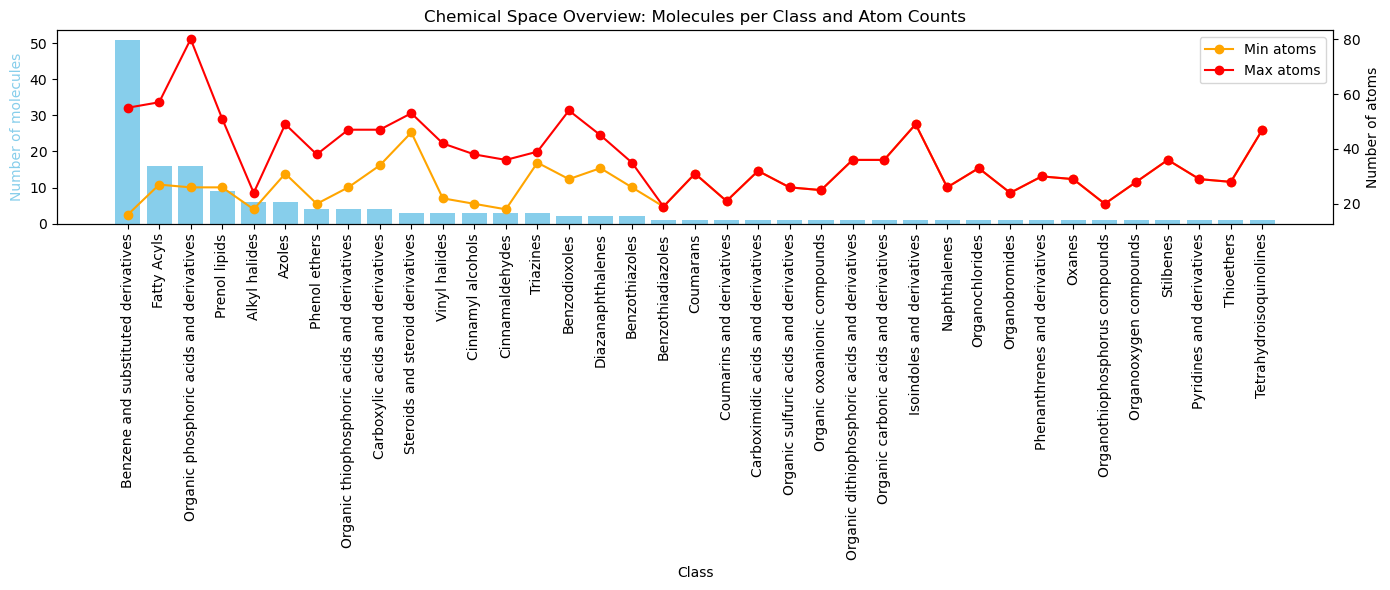

In [3]:
# ==============================
# Compute summaries
# ==============================
n_classes, mols_per_class = classes_summary(df_full)
atoms_min, atoms_max, atoms_per_class = atoms_summary(df_full)

try:
    mw_min, mw_max, mw_per_class = mw_summary(df_full)
except ValueError as e:
    print(e)
    mw_min, mw_max, mw_per_class = None, None, None

print("Number of classes:", n_classes)
print("Number of molecules per class:", mols_per_class)
print("Overall min number of atoms:", atoms_min)
print("Overall max number of atoms:", atoms_max)
print("Number of atoms per class:", atoms_per_class)

# ==============================
# Prepare summary DataFrame for plotting
# ==============================
df_summary = pd.DataFrame({
    'n_molecules': list(mols_per_class.values()),
    'n_atoms_min': [v['min'] for v in atoms_per_class.values()],
    'n_atoms_max': [v['max'] for v in atoms_per_class.values()]
}, index=atoms_per_class.keys())

df_summary = df_summary.sort_values('n_molecules', ascending=False)

# ==============================
# Plotting
# ==============================
plt.figure(figsize=(14,6))

# Bar plot: number of molecules per class
plt.bar(df_summary.index, df_summary['n_molecules'], color='skyblue', label='Number of molecules')
plt.ylabel('Number of molecules', color='skyblue')
plt.xlabel('Class')
plt.xticks(rotation=90)

# Line plot: min/max number of atoms per class (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(df_summary.index, df_summary['n_atoms_min'], color='orange', marker='o', label='Min atoms')
ax2.plot(df_summary.index, df_summary['n_atoms_max'], color='red', marker='o', label='Max atoms')
ax2.set_ylabel('Number of atoms', color='black')

# Legends and title
plt.title('Chemical Space Overview: Molecules per Class and Atom Counts')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
